In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_data = pd.read_csv("train.csv",parse_dates=[0,2,3,4,5,6,19])
test_data = pd.read_csv("test.csv",parse_dates=[0,2,3,4,5,6])

In [4]:
train_data.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaT
1,2021-01-26 02:33:16,556754,2021-01-26,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaT
2,2021-01-26 02:39:49,556755,2021-01-26,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaT
3,2021-01-26 02:47:53,556756,2021-01-26,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaT
4,2021-01-26 03:06:30,556757,2021-01-26,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaT


In [5]:
train_data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,13753.0,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.0,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.0,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,1.0,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,1.0,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,1.0,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.0,1298.966667


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [7]:
help(train_data['reassignment_method'].values)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [8]:
import seaborn as sns

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

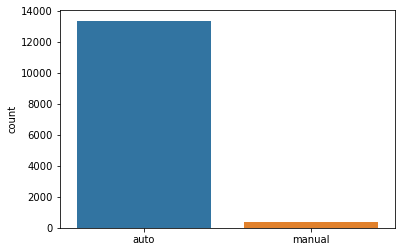

In [9]:
sns.countplot(train_data['reassignment_method'].values)

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

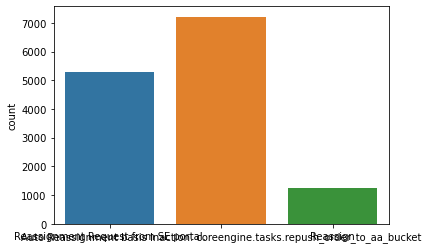

In [10]:
sns.countplot(train_data['reassignment_reason'].values)

In [11]:
train_data['reassignment_method'].value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [12]:
train_data['reassignment_reason'].value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [13]:
train_data['order_time']-train_data['order_date']

0        0 days 02:21:35
1        0 days 02:33:16
2        0 days 02:39:49
3        0 days 02:47:53
4        0 days 03:06:30
               ...      
449995   0 days 10:03:16
449996   0 days 10:03:17
449997   0 days 10:03:18
449998   0 days 10:03:19
449999   0 days 10:03:24
Length: 450000, dtype: timedelta64[ns]

## DATA SET IMBALANCE

In [14]:
train_data['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

# INDEPENDENT VARIABLES

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   order_date            144844 non-null  datetime64[ns]
 3   allot_time            144844 non-null  datetime64[ns]
 4   accept_time           144776 non-null  datetime64[ns]
 5   rider_id              144844 non-null  object        
 6   first_mile_distance   144844 non-null  object        
 7   last_mile_distance    144844 non-null  float64       
 8   alloted_orders        140071 non-null  float64       
 9   delivered_orders      139960 non-null  float64       
 10  undelivered_orders    139960 non-null  float64       
 11  lifetime_order_count  144066 non-null  float64       
 12  reassignment_method   4632 non-null    object        
 13 

pickup_time,delivered_time,cancelled_time are not there in test_data.. so we need to drop those from our training data set

Order date:- what to do???
    1)Mark days as weekdays, non-week days
    2)Take year, month and day and feed it to the model
Order time:- what to do??
    1) take hours and minutes and create a cycle or raw
    2)process entire

In [17]:
train_data['undelivered_orders'].value_counts()

0.0    232686
1.0    118103
2.0     50582
3.0     20011
4.0      7733
5.0      1851
6.0       932
7.0       600
8.0       105
9.0        56
Name: undelivered_orders, dtype: int64

In [18]:
del train_data['pickup_time']

In [19]:
del train_data['delivered_time']

In [20]:
del train_data['cancelled_time']

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   rider_id              450000 non-null  int64         
 6   first_mile_distance   450000 non-null  float64       
 7   last_mile_distance    450000 non-null  float64       
 8   alloted_orders        433052 non-null  float64       
 9   delivered_orders      432659 non-null  float64       
 10  cancelled             450000 non-null  int64         
 11  undelivered_orders    432659 non-null  float64       
 12  lifetime_order_count  449947 non-null  float64       
 13 

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   rider_id              450000 non-null  int64         
 6   first_mile_distance   450000 non-null  float64       
 7   last_mile_distance    450000 non-null  float64       
 8   alloted_orders        433052 non-null  float64       
 9   delivered_orders      432659 non-null  float64       
 10  cancelled             450000 non-null  int64         
 11  undelivered_orders    432659 non-null  float64       
 12  lifetime_order_count  449947 non-null  float64       
 13 

In [23]:
del train_data['order_date']
del test_data['order_date']

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        433052 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   13744 non-null   object        
 13 

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        140071 non-null  float64       
 8   delivered_orders      139960 non-null  float64       
 9   undelivered_orders    139960 non-null  float64       
 10  lifetime_order_count  144066 non-null  float64       
 11  reassignment_method   4632 non-null    object        
 12  reassignment_reason   4635 non-null    object        
 13 

## Modyfying Objects

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder=LabelEncoder()
train_data['reassignment_method']=label_encoder.fit_transform(train_data['reassignment_method'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reassignment_method', ylabel='count'>

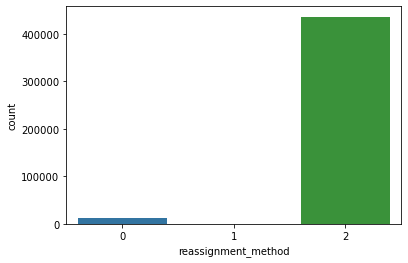

In [28]:
sns.countplot(train_data['reassignment_method'])

In [29]:
train_data['reassignment_method'].value_counts()

2    436256
0     13383
1       361
Name: reassignment_method, dtype: int64

In [30]:
label_encoder2=LabelEncoder()
train_data['reassignment_reason']=label_encoder.fit_transform(train_data['reassignment_reason'])

In [31]:
train_data['reassignment_reason'].value_counts()

3    436247
0      7212
2      5300
1      1241
Name: reassignment_reason, dtype: int64

In [32]:
test_data['reassignment_method']=label_encoder.fit_transform(test_data['reassignment_method'])
test_data['reassignment_reason']=label_encoder2.fit_transform(test_data['reassignment_reason'])

In [33]:
test_data['reassignment_reason'].value_counts()

3    140209
0      2593
2      1582
1       460
Name: reassignment_reason, dtype: int64

In [141]:
test_data['reassignment_method'].value_counts()

2    140212
0      4531
1       101
Name: reassignment_method, dtype: int64

#### why to keep 2 variables which indicate same thing? converting them

In [142]:
train_data['reassignment_score']=230+train_data['reassigned_order']-train_data['reassignment_method']*100-train_data['reassignment_reason']
test_data['reassignment_score']=230+train_data['reassigned_order']-test_data['reassignment_method']*100-test_data['reassignment_reason']

<ipython-input-142-65973db5b027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['reassignment_score']=230+train_data['reassigned_order']-train_data['reassignment_method']*100-train_data['reassignment_reason']


In [143]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449842 entries, 0 to 449999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            449842 non-null  datetime64[ns]
 1   order_id              449842 non-null  int64         
 2   allot_time            449842 non-null  datetime64[ns]
 3   accept_time           449842 non-null  datetime64[ns]
 4   rider_id              449842 non-null  int64         
 5   first_mile_distance   449842 non-null  float64       
 6   last_mile_distance    449842 non-null  float64       
 7   alloted_orders        449842 non-null  float64       
 8   delivered_orders      449842 non-null  float64       
 9   cancelled             449842 non-null  int64         
 10  undelivered_orders    449842 non-null  float64       
 11  lifetime_order_count  449842 non-null  float64       
 12  reassignment_method   449842 non-null  int32         
 13 

In [36]:
#train_data['is_weekend'].sum()

In [37]:
train_data.size

7200000

# Now that strings are removed let's focus on handling dates

In [38]:
train_data['is_weekend']=np.where(train_data['allot_time'].dt.day_name().isin(['Sunday','Saturday']),1,0)
test_data['is_weekend']=np.where(test_data['allot_time'].dt.day_name().isin(['Sunday','Saturday']),1,0)


In [39]:
train_data['is_weekend'].value_counts()

0    361276
1     88724
Name: is_weekend, dtype: int64

In [40]:
test_data['is_weekend'].value_counts()

0    80445
1    64399
Name: is_weekend, dtype: int64

## FORGOT SOMETHING!! Missing values!!

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        433052 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders'>

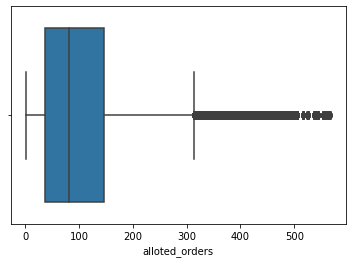

In [42]:
sns.boxplot(train_data['alloted_orders'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alloted_orders', ylabel='count'>

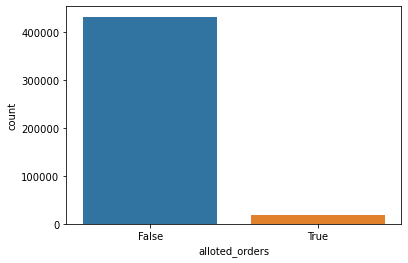

In [43]:
sns.countplot((train_data['alloted_orders']>300))

In [44]:
(train_data['alloted_orders']>500).sum()

390

In [45]:
train_data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,is_weekend
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,450000.000000,450000.000000,13753.0,446325.000000,450000.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.939718,2.934627,1.0,220.474779,0.197164
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.340776,0.403455,0.0,176.713853,0.397858
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,2.000000,3.000000,1.0,84.100000,0.000000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,2.000000,3.000000,1.0,175.550000,0.000000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,2.000000,3.000000,1.0,316.766667,0.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,2.000000,3.000000,1.0,1298.966667,1.000000


In [46]:
train_data['alloted_orders']=train_data['alloted_orders'].fillna(train_data['alloted_orders'].mean())

In [47]:
train_data.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,is_weekend
count,450000.000000,450000.000000,450000.000000,450000.000000,450000.000000,432659.000000,450000.000000,432659.000000,449947.000000,450000.000000,450000.000000,13753.0,446325.000000,450000.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,1.939718,2.934627,1.0,220.474779,0.197164
std,131146.906408,5592.880135,0.846183,1.884124,88.421847,89.639646,0.107057,1.066473,1502.976162,0.340776,0.403455,0.0,176.713853,0.397858
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,38.000000,36.000000,0.000000,0.000000,165.000000,2.000000,3.000000,1.0,84.100000,0.000000
50%,369842.500000,6754.000000,1.138700,2.670000,85.000000,81.000000,0.000000,0.000000,396.000000,2.000000,3.000000,1.0,175.550000,0.000000
75%,482342.250000,11965.000000,1.853000,4.220000,144.000000,146.000000,0.000000,1.000000,948.000000,2.000000,3.000000,1.0,316.766667,0.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,2.000000,3.000000,1.0,1298.966667,1.000000


In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        450000 non-null  float64       
 8   delivered_orders      432659 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    432659 non-null  float64       
 11  lifetime_order_count  449947 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

In [49]:
train_data['delivered_orders']=train_data['delivered_orders'].fillna(train_data['delivered_orders'].mean())

In [50]:
train_data['undelivered_orders']=train_data['undelivered_orders'].fillna(0)

In [51]:
train_data['session_time']=train_data['session_time'].fillna(train_data['session_time'].mean())

In [52]:
train_data['lifetime_order_count']=train_data['lifetime_order_count'].fillna(train_data['lifetime_order_count'].mean())

In [55]:
train_data['reassigned_order'].value_counts()

1.0    13753
Name: reassigned_order, dtype: int64

In [56]:
train_data['reassigned_order']=train_data['reassigned_order'].fillna(0)

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   allot_time            450000 non-null  datetime64[ns]
 3   accept_time           449843 non-null  datetime64[ns]
 4   rider_id              450000 non-null  int64         
 5   first_mile_distance   450000 non-null  float64       
 6   last_mile_distance    450000 non-null  float64       
 7   alloted_orders        450000 non-null  float64       
 8   delivered_orders      450000 non-null  float64       
 9   cancelled             450000 non-null  int64         
 10  undelivered_orders    450000 non-null  float64       
 11  lifetime_order_count  450000 non-null  float64       
 12  reassignment_method   450000 non-null  int32         
 13 

In [59]:
train_data['wait_time']=(train_data['allot_time']-train_data['accept_time'])/np.timedelta64(1,'m')

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

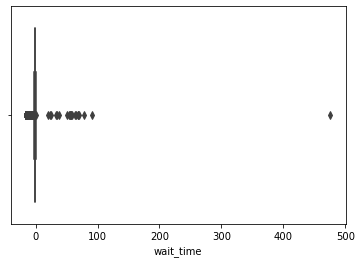

In [64]:
sns.boxplot(train_data['wait_time'])

C:\Users\rahul_liauvpp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wait_time'>

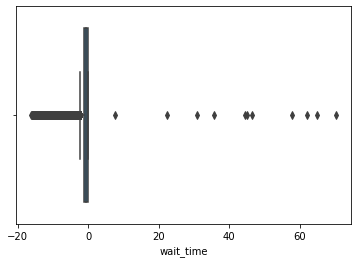

In [66]:
test_data['wait_time']=(test_data['allot_time']-test_data['accept_time'])/np.timedelta64(1,'m')
sns.boxplot(test_data['wait_time'])

In [68]:
test_data['wait_time'].describe()

count    144776.000000
mean         -1.024998
std           1.664429
min         -16.116667
25%          -1.116667
50%          -0.616667
75%          -0.216667
max          70.216667
Name: wait_time, dtype: float64

#### Since there are no waittime >100 in test_data it is being removed from train data

In [69]:
Train_data=train_data
train_data=train_data[train_data['wait_time']<=100]

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449842 entries, 0 to 449999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            449842 non-null  datetime64[ns]
 1   order_id              449842 non-null  int64         
 2   allot_time            449842 non-null  datetime64[ns]
 3   accept_time           449842 non-null  datetime64[ns]
 4   rider_id              449842 non-null  int64         
 5   first_mile_distance   449842 non-null  float64       
 6   last_mile_distance    449842 non-null  float64       
 7   alloted_orders        449842 non-null  float64       
 8   delivered_orders      449842 non-null  float64       
 9   cancelled             449842 non-null  int64         
 10  undelivered_orders    449842 non-null  float64       
 11  lifetime_order_count  449842 non-null  float64       
 12  reassignment_method   449842 non-null  int32         
 13 

In [93]:
train_data['time_of_day']=train_data['order_time'].dt.hour*60+train_data['order_time'].dt.minute
test_data['time_of_day']=test_data['order_time'].dt.hour*60+test_data['order_time'].dt.minute

<ipython-input-93-0905545c4105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['time_of_day']=train_data['order_time'].dt.hour*60+train_data['order_time'].dt.minute


In [94]:
train_data['time_of_day'].describe()

count    449842.000000
mean        794.010999
std         216.618174
min          44.000000
25%         558.000000
50%         866.000000
75%         966.000000
max        1301.000000
Name: time_of_day, dtype: float64

In [76]:
(train_data['order_time'].dt.hour).value_counts()

14    70564
16    66291
15    66169
17    53621
13    43397
7     37644
8     37539
6     22882
9     22232
12     9259
10     8903
11     8131
4      1211
5      1088
3       644
18      167
2        61
19       25
20        8
0         2
1         2
21        2
Name: order_time, dtype: int64

In [125]:
train_data['normalised_time']=np.sin(train_data['time_of_day']/1440*np.pi)
test_data['normalised_time']=np.sin(test_data['time_of_day']/1440*np.pi)

<ipython-input-125-70f62e6e6d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['normalised_time']=np.sin(train_data['time_of_day']/1440*np.pi)


In [126]:
train_data['normalised_time'].describe()

count    449842.000000
mean          0.879052
std           0.081186
min           0.095846
25%           0.817899
50%           0.891007
75%           0.946930
max           1.000000
Name: normalised_time, dtype: float64

In [127]:
train_data.isna().any()

order_time              False
order_id                False
allot_time              False
accept_time             False
rider_id                False
first_mile_distance     False
last_mile_distance      False
alloted_orders          False
delivered_orders        False
cancelled               False
undelivered_orders      False
lifetime_order_count    False
reassignment_method     False
reassignment_reason     False
reassigned_order        False
session_time            False
is_weekend              False
wait_time               False
time_of_day             False
normalised_time         False
dtype: bool

In [128]:
train_data.isnull().any()

order_time              False
order_id                False
allot_time              False
accept_time             False
rider_id                False
first_mile_distance     False
last_mile_distance      False
alloted_orders          False
delivered_orders        False
cancelled               False
undelivered_orders      False
lifetime_order_count    False
reassignment_method     False
reassignment_reason     False
reassigned_order        False
session_time            False
is_weekend              False
wait_time               False
time_of_day             False
normalised_time         False
dtype: bool

In [129]:
train_data[train_data.columns [train_data.isna ().any ()]]

""
0
1
2
3
4
...
449995
449996
449997
449998


In [130]:
train_data.isnull ().any()

order_time              False
order_id                False
allot_time              False
accept_time             False
rider_id                False
first_mile_distance     False
last_mile_distance      False
alloted_orders          False
delivered_orders        False
cancelled               False
undelivered_orders      False
lifetime_order_count    False
reassignment_method     False
reassignment_reason     False
reassigned_order        False
session_time            False
is_weekend              False
wait_time               False
time_of_day             False
normalised_time         False
dtype: bool

In [83]:
train_data.loc[:, train_data.isnull().any()]

""
0
1
2
3
4
...
449995
449996
449997
449998


In [131]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        144844 non-null  float64       
 8   delivered_orders      144844 non-null  float64       
 9   undelivered_orders    144844 non-null  float64       
 10  lifetime_order_count  144844 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

In [132]:
test_data['undelivered_orders']=test_data['undelivered_orders'].fillna(0)

In [133]:
test_data['delivered_orders']=test_data['delivered_orders'].fillna(test_data['delivered_orders'].mean())

In [134]:
test_data['session_time']=test_data['session_time'].fillna(train_data['session_time'].mean())

In [135]:
test_data['reassigned_order']=test_data['reassigned_order'].fillna(0)

In [136]:
test_data['alloted_orders']=test_data['alloted_orders'].fillna(train_data['alloted_orders'].mean())

In [137]:
test_data['lifetime_order_count']=test_data['lifetime_order_count'].fillna(train_data['lifetime_order_count'].mean())

In [138]:
test_data['wait_time']=test_data['wait_time'].fillna(train_data['wait_time'].mean())

In [144]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        144844 non-null  float64       
 8   delivered_orders      144844 non-null  float64       
 9   undelivered_orders    144844 non-null  float64       
 10  lifetime_order_count  144844 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

In [145]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            144844 non-null  datetime64[ns]
 1   order_id              144844 non-null  int64         
 2   allot_time            144844 non-null  datetime64[ns]
 3   accept_time           144776 non-null  datetime64[ns]
 4   rider_id              144844 non-null  object        
 5   first_mile_distance   144844 non-null  object        
 6   last_mile_distance    144844 non-null  float64       
 7   alloted_orders        144844 non-null  float64       
 8   delivered_orders      144844 non-null  float64       
 9   undelivered_orders    144844 non-null  float64       
 10  lifetime_order_count  144844 non-null  float64       
 11  reassignment_method   144844 non-null  int32         
 12  reassignment_reason   144844 non-null  int32         
 13 

# NO, it's not the end!! dates will be processed again!!
just checking for efficiency of model

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_data.drop(['order_time',"allot_time","accept_time","cancelled","order_id","time_of_day",'reassignment_method','reassignment_reason','reassigned_order'],axis=1),train_data['cancelled'] , random_state=42)

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(test_data.drop(['order_time',"allot_time","accept_time","order_id","time_of_day",'reassignment_method','reassignment_reason','reassigned_order'],axis=1))

In [150]:
X_train.shape

(337381, 12)

In [151]:
X_test.shape

(144844, 12)

In [152]:
model=keras.models.Sequential([
    keras.layers.Dense(500,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(50,activation="sigmoid"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [153]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               6500      
                                                                 
 dense_4 (Dense)             (None, 50)                25050     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(), metrics=[keras.metrics.AUC()])

In [155]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model_nrg.h5", save_best_only=True)

In [156]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model3.h5", save_best_only=True)

In [157]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])  #training the model several times

Epoch 1/50
10544/10544 [==============================] - 15s 1ms/step - loss: 0.0554 - auc_2: 0.7288 - val_loss: 0.0548 - val_auc_2: 0.7205
Epoch 2/50
10544/10544 [==============================] - 19s 2ms/step - loss: 0.0554 - auc_2: 0.7302 - val_loss: 0.0548 - val_auc_2: 0.7169
Epoch 3/50
  386/10544 [>.............................] - ETA: 18s - loss: 0.0587 - auc_2: 0.7027

In [114]:
y_test=model.predict(X_test)

In [115]:
y_test

array([[0.0050931 ],
       [0.00325915],
       [0.00572813],
       ...,
       [0.01382589],
       [0.00680369],
       [0.01928574]], dtype=float32)

In [ ]:
del model

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("early_stop_model.h5")
Y_test=model.predict(X_test)

In [ ]:
(y_test>0.5).sum()

In [ ]:
keras.backend.clear_session()

In [ ]:
model.summary()

In [ ]:
del model

In [116]:
y_test.size

144844

In [117]:
type(y_test)

numpy.ndarray

In [118]:
res=pd.DataFrame(test_data['order_id'])

In [119]:
res.size

144844

In [120]:
res['cancelled']=y_test

In [121]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   144844 non-null  int64  
 1   cancelled  144844 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.7 MB


In [123]:

res.columns = ["order_id","cancelled"]
res.to_csv("prediction_results2.csv", index = False)   

In [124]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144844 entries, 0 to 144843
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   144844 non-null  int64  
 1   cancelled  144844 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 1.7 MB
